## Logistic Regression with SGD

To begin you first need to install all dependencies, using:

    pip install -r requirements.txt

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

from math import exp, log
import os
import pickle

from skimage import io
from skimage.color import rgb2gray
from skimage.feature import hog

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

In [2]:
%matplotlib inline

### load the dataset

In [3]:
### set your image dir here
IMAGE_DIR = "./data/"

In [4]:
def load_dataset(subset="train"):
    """
    1. subset = "train", "val", "test"
    2. About the dataset: in "train","val" subset, the first half of images are images of hands, the rest half are images of not-hand. 
    3. extract features from HoG
    """
    path = os.path.join(IMAGE_DIR,subset)
    name_list = os.listdir(path)
    print("Number of images in {}-set: {}".format(subset, len(name_list)))
    #HoG returns 324 features
    X = np.zeros(shape=(len(name_list), 324))

    if subset == "train" or subset == "val":
        #Make sure that we have equal number of positive and negative class images
        assert len(name_list)%2 == 0
        count = len(name_list)//2
        y = np.array(count*[1] + count*[0])
        for idx_true in range(count):
            img_name = os.path.join(path,str(idx_true)+".png")
            img = io.imread(img_name)
            img = rgb2gray(img)
            vec = hog(img)
            X[idx_true, :] = vec
        
        for idx in range(count):
            idx_false = idx + count
            img_name = os.path.join(path,str(idx_false)+".png")
            img = io.imread(img_name)
            img = rgb2gray(img)
            vec = hog(img)
            X[idx_false, :] = vec
        return X, y        
    else:
        for idx in range(len(name_list)):
            img_name = os.path.join(path, str(idx)+".png")
            img = io.imread(img_name)
            img = rgb2gray(img)
            vec = hog(img)
            X[idx, :] = vec
        return X

### load the data

In [5]:
X_train, y_train = load_dataset("train")
X_val, y_val = load_dataset("val")
X_test = load_dataset("test")

Number of images in train-set: 8170


C:\Users\Saif\Anaconda2\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Number of images in val-set: 2724
Number of images in test-set: 5542


### displaying images

In [6]:
def display(img_path):
    """
    visualize the img
    """
    img = io.imread(img_path)
    print(img_path)
    io.imshow(img)
    io.show()

./data/train/1.png


C:\Users\Saif\Anaconda2\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Saif\AppData\Roaming\Python\Python27\site-packages\matplotlib\axes\_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


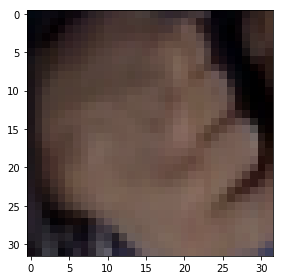

In [7]:
display(IMAGE_DIR+"train/1.png")

### Logistic regression

#### Main function in the class
1. \__init\__() which sets the hyper parameters
2. sigmoid()
3. __init_param(), initializes the parameters .
4. fit(): train the data
5. predict_proba(): predict the probability of the sample belonging to the positive class
6. predict(): classify the sample


Feel free to overlook the rest of the parts of the code, it's just for convenience.


In [8]:
class LogisticRegression:
    """
    Logistic Regression
    """
    def __init__(self, eta0=0.1, eta1=1, m=16, max_epoch=1000, delta=0.0001):
        """
        m is the batch_size
        """
        self.__init = True # whether to initial the parameters
        self.__eta0 = eta0
        self.__eta1 = eta1
        self.__delta = delta
        self.__m = m
        self.__max_epoch = max_epoch
        self.epochs = 0
        self.cost_l = []
        self.accur= []
        
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))
    
    def __init_param(self):
        """
        Weights initialized using a normal distribution here: you can change the distribution.
        """
        d = self.__dimension
        self.__wt = np.random.randn(1,d)
        self.__bias = np.random.randn()
        return self.__wt,self.__bias
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Recommended input:
        X: n x d array,
        y: n x 1 array or list
        """
        n, d = X.shape
        y=np.reshape(y,(n,1))
        self.__dimension = d
        
        if self.__init:
            self.__init_param()
        
        ### write your code here ### 

        ############################
        
        
        for epoch in range(0,self.__max_epoch):
            self.epochs+=1
            eta=(self.__eta0/(self.__eta1+epoch+1))
            indices=np.arange(n,dtype=int)
            indices=np.random.permutation(indices)
            X_shuffled,y_shuffled=[],[]
            for each in range(0,len(indices)):
                X_shuffled.append(X[[indices[each]],:])
                y_shuffled.append(y[[indices[each]],:])
            X_new=np.array(X_shuffled)
            y_new=np.array(y_shuffled)
            X_new=np.reshape(X_new,X.shape)
            y_new=np.reshape(y_new,y.shape)
            X_new=np.transpose(X_new)
            ones=np.ones(shape=(1,n))
            X_new=np.vstack((X_new,ones))
            theta,bias=self.get_param()
            theta_old=np.append(theta,bias)
            theta_new=np.append(theta,bias)
            rem=n%self.__m
            iter_no=1
            for i in range(0,int(n/self.__m)-rem):
                batch_X=X_new[:,(iter_no-1)*self.__m:(iter_no)*self.__m]
                batch_y=y_new[(iter_no-1)*self.__m:(iter_no)*self.__m,:]
                sig=[]
                for j in range(0,self.__m):
                    sig.append(self.sigmoid(np.dot(theta_new,batch_X[:,[j]])))
                sig=np.array(sig)
                sig=np.reshape(sig,(batch_X.shape[1],1))
                diff=np.subtract(batch_y,sig)
                X_temp=np.copy(batch_X)
                for j in range(0,self.__m):
                    X_temp[:,[j]]=np.multiply(diff.item((j,0)),X_temp[:,[j]])
                sum_der=np.sum(X_temp,axis=1)
                grad=np.multiply(-(eta/(self.__m)),sum_der)
                theta_new=np.subtract(theta_new,grad)
                self.__wt=np.copy(theta_new)
                self.__wt=np.reshape(self.__wt,(d+1,1))
                self.__wt=np.delete(self.__wt,d,0)
                self.__bias=theta_new.item(d)
                iter_no+=1
            base=(iter_no-1)*self.__m
            for i in range(0,rem):
                batch_X=X_new[:,base+i*(self.__m+1):base+(i+1)*(self.__m+1)]
                batch_y=y_new[base+i*(self.__m+1):base+(i+1)*(self.__m+1),:]
                sig=[]
                for j in range(0,self.__m+1):
                    sig.append(self.sigmoid(np.dot(theta_new,batch_X[:,[j]])))
                sig=np.array(sig)
                sig=np.reshape(sig,(batch_X.shape[1],1))
                diff=np.subtract(batch_y,sig)
                X_temp=np.copy(batch_X)
                for j in range(0,self.__m+1):
                    X_temp[:,[j]]=np.multiply(diff.item((j,0)),X_temp[:,[j]])
                sum_der=np.sum(X_temp,axis=1)
                grad=np.multiply(-(eta/(self.__m+1)),sum_der)
                theta_new=np.subtract(theta_new,grad)
                self.__wt=np.copy(theta_new)
                self.__wt=np.reshape(self.__wt,(d+1,1))
                self.__wt=np.delete(self.__wt,d,0)
                self.__bias=theta_new.item(d)
                iter_no+=1
            l_old,l_new=0.0,0.0
            for i in range(0,n):
                if epoch==0:
                    l_old+=y_new.item((i,0))*np.dot(theta_old,X_new[:,i])-np.log(1+np.exp(np.dot(theta_old,X_new[:,i])))
                l_new+=y_new.item((i,0))*np.dot(theta_new,X_new[:,i])-np.log(1+np.exp(np.dot(theta_new,X_new[:,i])))
            if epoch==0:
                l_old=-(l_old/n)
            else:
                l_old=self.cost_l[epoch-1]
            l_new=-(l_new/n)
            self.cost_l.append(l_new)
            self.accur.append(accuracy_score(y_new,self.predict(X_new)))
            if l_new>(1-self.__delta)*l_old:
                break
            else:
                self.__wt=np.copy(theta_new)
                self.__wt=np.reshape(self.__wt,(d+1,1))
                self.__wt=np.delete(self.__wt,d,0)
                self.__bias=theta_new.item(d)
        return self.__wt
    
    def predict_proba(self, X):
        """
        predict the probility of the sample
        You can refer to my code below
        """
        d,batch_n=X.shape
        prob=[]
        theta_p,bias_p=self.get_param()
        theta_p=np.append(theta_p,bias_p)
        for i in range(batch_n):
            prob.append(self.sigmoid(np.dot(theta_p,X[:,[i]])))
        prob=np.array(prob)
        prob=np.reshape(prob,(batch_n,1))
        return prob
#         return a vector containing the probability values of the samples belonging to the positive class
    
    def predict(self, X):
        """
        Classify the sample
        """
        pred=[]
        for i in range(0,X.shape[1]):
            if self.predict_proba(X[:,[i]]).item(0,0)>=0.50:
                pred.append(1)
            else:
                pred.append(0)
        pred=np.array(pred)
        pred=np.reshape(pred,(X.shape[1],1))
        return pred
#         return self.predict_proba(X) >= 0.5 # attention: this will give result in bool, you need to convert it to int for submission. 
    
    
    def get_param(self):
        """
        output:
            parameters: wt(1*d array), b(scalar)
        """
        return [self.__wt, self.__bias]
    
    def save_model(self, save_file):
        """
        save model to .pkl file
        """
        with open(save_file,"wb") as file:
            pickle.dump([self.__wt, self.__bias],file)

    def load_model(self, load_file):
        """
        load model from .pkl file
        """
        with open(load_file,"rb") as file:
            param = pickle.load(file)
        self.__wt = param[0]
        self.__bias = param[1]
        self.__init = False
        return self.__wt, self.__bias

## Question 2.3

### 1. Baseline Model

In [9]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR.save_model("LR1.pkl")

(a) Number of epochs till termination = 365

In [23]:
## this function predicts the output based on the probabilities

def predict_output(probabilities):
    pred=[]
    for i in range(0,probabilities.shape[0]):
        if probabilities.item(i,0)>=0.50:
            pred.append(1)
        else:
            pred.append(0)
    p=np.array(pred)
    p=np.reshape(p,(probabilities.shape[0],1))
    return pred

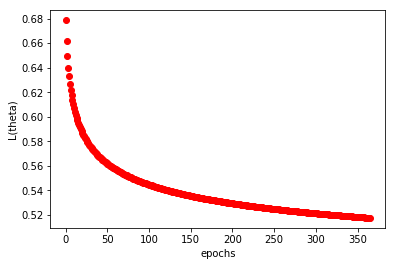

final value of L(theta)  0.5175504365325073


In [25]:
# (b) Plot L(theta) vs num_epochs
num_epochs=np.arange(LR.epochs)
plt.plot(num_epochs,LR.cost_l,'ro')
plt.xlabel("epochs")
plt.ylabel("L(theta)")
plt.show()
print "final value of L(theta) ",LR.cost_l[LR.epochs-1]

(c) Final value of L($\theta$) after optimization = 0.5175504365325073

### 2. Experimenting with ($\eta_0$,$\eta_1$)

In [12]:
# Experimentation code goes here
eta0=[1,2.5,0.1,0.01,0.001]
eta1=[0.1,1,2,5,10]
no_of_epochs=[]
value_of_l=[]
for i in range(len(eta0)):
    for j in range(len(eta1)):
        LR_i=LogisticRegression(eta0[i],eta1[j])
        LR_i.fit(X_train,y_train)
        no_of_epochs.append(LR_i.epochs)
        value_of_l.append(LR_i.cost_l[LR_i.epochs-1])
        del LR_i
print no_of_epochs
print value_of_l



[257, 302, 341, 395, 446, 69, 219, 247, 308, 360, 302, 324, 406, 375, 400, 72, 93, 84, 113, 87, 9, 107, 72, 46, 49]
[0.3231485447122478, 0.3317651754202214, 0.3357897665793229, 0.3439471189951527, 0.3452764347792867, 0.29680946550912407, 0.2945098954372119, 0.2966079306246149, 0.30168055570877217, 0.3063306538872352, 0.48459024427511965, 0.5015642384042457, 0.5326420622786475, 0.523067162139962, 0.5419086385989232, 0.6451168894580391, 0.6989538331474503, 0.658768950325488, 0.7011087483672581, 0.6763403883095895, 0.6965464596767512, 0.6544164116240243, 0.6755106922602975, 0.7333689490944877, 0.7563060802083036]


(a) Best value for, $\eta_0$ = 2.5, $\eta_1$ = 0.1

Number of epochs for training = 69

Final value of L($\theta$) = 0.29680946550912407

Text(0,0.5,'L(theta)')

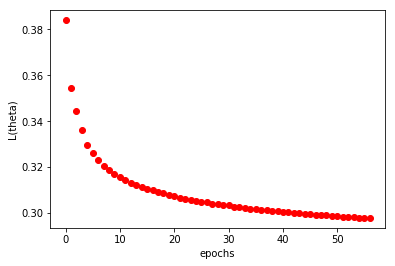

In [26]:
# (b) For best (eta_0, eta_1) plot L(theta) vs num_epochs
LR_best=LogisticRegression(2.5,0.1)
LR_best.fit(X_train,y_train)
plt.plot(np.arange(LR_best.epochs),LR_best.cost_l,'ro')
plt.xlabel("epochs")
plt.ylabel("L(theta)")

### 3. Evaluating on validation set

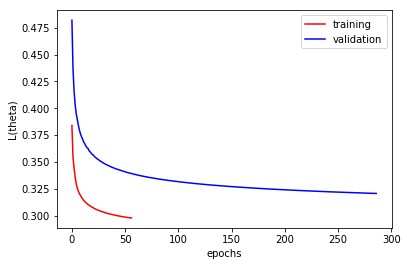

In [28]:
# (a) Plot L(theta) vs num_epochs for both training and validation set on the same figure
LR_val=LogisticRegression(2.5,0.1)
LR_val.fit(X_val,y_val)
plt.plot(np.arange(LR_best.epochs),LR_best.cost_l,'r',label='training')   ##used from above cell
plt.plot(np.arange(LR_val.epochs),LR_val.cost_l,'b',label='validation')
plt.xlabel("epochs")
plt.ylabel("L(theta)")
plt.legend()

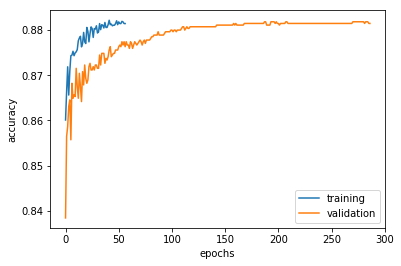

In [29]:
# (b) Plot Accuracy vs num_epochs for both training and validation set on the same figure
plt.plot(np.arange(LR_best.epochs),LR_best.accur,label='training')
plt.plot(np.arange(LR_val.epochs),LR_val.accur,label='validation')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

### 4. ROC and Precision-Recall curves

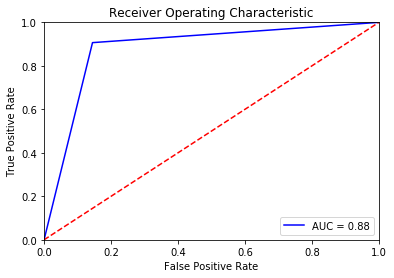

In [30]:
#(a) Plot ROC curve on validation data
from sklearn.metrics import auc
X_v=np.copy(X_val)
X_v=np.transpose(X_v)
one=np.ones(shape=(1,X_v.shape[1]))
X_v=np.vstack((X_v,one))
#print X_v.shape
val_probs=LR_best.predict_proba(X_v)
val_pred=predict_output(val_probs)
#print np.count_nonzero(val_pred)
#print LR_best.get_param()
fpr, tpr, threshold = roc_curve(y_val, val_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Area under curve = 0.88

Average precision-recall score: 0.83


Text(0.5,1,'2-class Precision-Recall curve: AP=0.83')

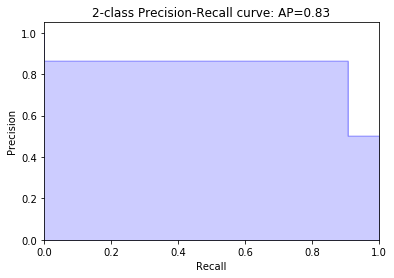

In [31]:
#(a) Plot Precision-Recall curve on validation data
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_val, val_pred)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
precision, recall, thresholds = precision_recall_curve(y_val, val_pred)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

Average Precision = 0.83

## Question 2.4

### 1. Submission

In [18]:
import pandas as pd
def submission(y_pred):
    """
    generate the submission.csv for kaggle
    input args:
        y_pred: 5542x1 array or list contains 5542 elements
        
    """
    save_file = pd.DataFrame(columns=["Id","Class"])
    id = np.array([idx for idx in range(5542)])
    save_file["Id"] = id
    save_file["Class"]= y_pred
    save_file.to_csv("submission.csv",index=0)       

#### Generate the submission.csv

In [19]:
# code goes here
L_sub=LogisticRegression(2.5,2)
X_new_train=np.vstack((X_train,X_val))
y_new_train=np.hstack((y_train,y_val))
L_sub.fit(X_new_train,y_new_train)
X_t=np.copy(X_test)
X_t=np.transpose(X_t)
print X_t.shape
ones=np.ones(shape=(1,X_t.shape[1]))
X_t=np.vstack((X_t,ones))
#LR_sub=LogisticRegression(2.5,10)
#LR_sub.fit(X_train,y_train)
print "fitted"
y_pred=L_sub.predict(X_t)
print y_pred.shape
submission(y_pred)

(324, 5542)
fitted
(5542, 1)


Best obtained accuracy on Public Leader-board = 87.333%